In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip3 install catboost

     |████████████████████████████████| 65.7MB 44kB/s 


In [3]:
!pip install scikit-plot

In [4]:
cd '/content/drive/My Drive/Konkursy Kaggle/Disaster Tweets'

/content/drive/My Drive/Konkursy Kaggle/Disaster Tweets


Data taken from https://www.kaggle.com/c/nlp-getting-started/data


In [5]:
train = pd.read_csv('/content/drive/My Drive/Konkursy Kaggle/Disaster Tweets/train.csv').reset_index(drop=True)
test = pd.read_csv('/content/drive/My Drive/Konkursy Kaggle/Disaster Tweets/test.csv').reset_index(drop=True)

In [6]:
train.sample(10)

,id,keyword,location,text,target
4476,6366,hostages,china,#hot C-130 specially modified to land in a st...,0
1316,1900,burning,"Paradise, NV",Uhhhhh demon hunters. But not the whole Burnin...,0
5137,7326,nuclear%20reactor,NaN,Navy sidelines 3 newest subs http://t.co/gpVZV...,0
2774,3990,devastation,"Denver, CO",$10M SETTLEMENT attained using our illustratio...,1
5692,8122,rescued,NIGERIA,http://t.co/QGyN2u1UP3 Rescued Med migrants ar...,1
3116,4472,electrocuted,"South West, England",MT @Earths_Voice Treatment of #tigers in #Chin...,1
208,294,ambulance,"Davidson, NC",People who try to j-walk while an ambulance is...,0
5186,7403,obliterated,NaN,air sunrays obliterated on its hairy head like...,0
2042,2932,danger,Hailing from Dayton,I wish I could get Victoria's Secret on front....,0
3264,4689,engulfed,USA,Car engulfed in flames backs up traffic at Par...,1


Check if there are missing values and fill it

In [7]:
def is_missing(train):
  for column in train.columns:
      missing = column, train[column].isnull().sum()
      if missing[1] == 0: continue
      print(missing)

is_missing(train)
is_missing(test)

('keyword', 61)
('location', 2533)
('keyword', 26)
('location', 1105)


In [8]:
train = train.fillna("other")
test = test.fillna("other")

In [9]:
#concatenate the subsets
all = pd.concat([train, test], sort=False)

In [10]:
all.head()

,id,keyword,location,text,target
0,1,other,other,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,other,other,Forest fire near La Ronge Sask. Canada,1.0
2,5,other,other,All residents asked to 'shelter in place' are ...,1.0
3,6,other,other,"13,000 people receive #wildfires evacuation or...",1.0
4,7,other,other,Just got sent this photo from Ruby #Alaska as ...,1.0


Data cleanup

In [11]:
all.keyword.value_counts()

other                    87
buildings%20burning      50
sandstorm                50
attack                   50
whirlwind                50
                         ..
forest%20fire            24
threat                   16
radiation%20emergency    14
inundation               14
epicentre                13
Name: keyword, Length: 222, dtype: int64

In [12]:
#keywords
all.loc[all['keyword'].str.contains('murder|bag'), 'keyword'] = 'murder'
all.loc[all['keyword'].str.contains('fire|burn'), 'keyword'] = 'fire'
all.loc[all['text'].str.contains('fire'), 'keyword'] = 'fire'
all.loc[all['keyword'].str.contains('radiation|nuclear|chemical|oil'), 'keyword'] = 'bioterrorism'
all.loc[all['keyword'].str.contains('bomb|loud'), 'keyword'] = 'bomb'
all.loc[all['text'].str.contains('bomb|explode|loud'), 'keyword'] = 'bomb'
all.loc[all['keyword'].str.contains('inundation'), 'keyword'] = 'flooding'
all.loc[all['text'].str.contains('flood|Flood'), 'keyword'] = 'flooding'
all.loc[all['keyword'].str.contains('war|battle|structural'), 'keyword'] = 'war'
all.loc[all['keyword'].str.contains('epicentre|bridge|cliff'), 'keyword'] = 'earthquake'
all.loc[all['text'].str.contains('earthquake|EARTHQUAKE|Earthquake|bridge'), 'keyword'] = 'earthquake'
all.loc[all['keyword'].str.contains('threat|violent'), 'keyword'] = 'danger'
all.loc[all['text'].str.contains('Violent'), 'keyword'] = 'danger'
all.loc[all['keyword'].str.contains('emergency'), 'keyword'] = 'emergency'
all.loc[all['text'].str.contains('emergency'), 'keyword'] = 'emergency'
all.loc[all['keyword'].str.contains('blew|blown|dust'), 'keyword'] = 'windstorm'
all.loc[all['text'].str.contains('hurricane|tornado'), 'keyword'] = 'windstorm'
all.loc[all['keyword'].str.contains('airplane'), 'keyword'] = 'crash'
all.loc[all['text'].str.contains('crash|car'), 'keyword'] = 'crash'
all.loc[all['keyword'].str.contains('first'), 'keyword'] = 'rescued'
all.loc[all['keyword'].str.contains('disaster'), 'keyword'] = 'disaster'
all.loc[all['text'].str.contains('heat|Heat'), 'keyword'] = 'heat'

In [13]:
all.loc[all['keyword']=='other' ]

,id,keyword,location,text,target
2,5,other,other,All residents asked to 'shelter in place' are ...,1.0
15,23,other,other,What's up man?,0.0
16,24,other,other,I love fruits,0.0
17,25,other,other,Summer is lovely,0.0
19,28,other,other,What a goooooooaaaaaal!!!!!!,0.0
20,31,other,other,this is ridiculous....,0.0
21,32,other,other,London is cool ;),0.0
22,33,other,other,Love skiing,0.0
23,34,other,other,What a wonderful day!,0.0
24,36,other,other,LOOOOOOL,0.0


In [14]:
#location
all.loc[all['location'].str.contains('Iraq|Pakistan'), 'location'] = 'Asia'
all.loc[all['location'].str.contains('Las Vegas'), 'location'] = 'Las Vegas'
all.loc[all['location'].str.contains('Irleand|Dublin'), 'location'] = 'Irleand'
all.loc[all['location'].str.contains('OH|Ohio'), 'location'] = 'Ohio'
all.loc[all['location'].str.contains('Brazil'), 'location'] = 'Brasil'
all.loc[all['location'].str.contains('MO|Kansas City'), 'location'] = 'Missouri'
all.loc[all['location'].str.contains('umbai|India'), 'location'] = 'India'
all.loc[all['location'].str.contains('Italy|France|Switzerland|Netherlands|Germany|Sweden|Geneva|Rome|Spain'), 'location'] = 'Europe'
all.loc[all['location'].str.contains('Nigeria|Lagos'), 'location'] = 'Nigeria'
all.loc[all['location'].str.contains('Japan|Tokyo'), 'location'] = 'Japan'
all.loc[all['location'].str.contains('Virginia|VA'), 'location'] = 'Virginia'
all.loc[all['location'].str.contains('Hong Kong|china|China'), 'location'] = 'China'
all.loc[all['location'].str.contains('Edinburgh'), 'location'] = 'Scotland'
all.loc[all['location'].str.contains('NC|North Carolina'), 'location'] = 'North Carolina'
all.loc[all['location'].str.contains('Portland'), 'location'] = 'Portland'
all.loc[all['location'].str.contains('Boston|WI|PA|IA|Poenix|Georgia|America|United States|Unites States|U.S.A|US|U.S.|Wisconsin|New Hampshire|Arizona|Midwest|Indiana|Maryland|Pennsylvania|Puerto Rico|Oregon|Michigan'), 'location'] = 'USA'
all.loc[all['location'].str.contains('NJ|NY|New York|NYC|york|nyc'), 'location'] = 'New York'
all.loc[all['location'].str.contains('Sydney'), 'location'] = 'Sydney'
all.loc[all['location'].str.contains('ondon|United Kingdom|England|Coventry|Birmingham|Paignton|Liverpool|Glasgow|Newcastle|UK|Manchester'), 'location'] = 'UK'
all.loc[all['location'].str.contains('Australia|Melbourne|Sydney'), 'location'] = 'Australia'
all.loc[all['location'].str.contains('California|San Diego|Sacramento|San Francisco'), 'location'] = 'California'
all.loc[all['location'].str.contains('Washington'), 'location'] = 'Washington'
all.loc[all['location'].str.contains('Chicago'), 'location'] = 'Chicago'
all.loc[all['location'].str.contains('Los Angeles|Subconscious|LA'), 'location'] = 'Los Angeles'
all.loc[all['location'].str.contains('Seattle, WA'), 'location'] = 'Seattle'
all.loc[all['location'].str.contains('World|orldwide|Earth|Global|The Universe'), 'location'] = 'Everywhere'
all.loc[all['location'].str.contains('TX|Texas|Houston'), 'location'] = 'Texas'
all.loc[all['location'].str.contains('CA|Canada|Toronto|Vancouver|canada|Calgary'), 'location'] = 'Canada'
all.loc[all['location'].str.contains('TN'), 'location'] = 'Tennessee'
all.loc[all['location'].str.contains('FL|Orlando'), 'location'] = 'Florida'
all.loc[all['location'].str.contains('304|house|hell|Taylor|Tunes|stairs|Coffee|ss|Money|Happily Married|MAD as Hell|Billionaires|Word|Pedophile|Narnia|Your screen|Here|Jupiter|Anonymous|really|Breaking|where|All|Some|Innerhalb|Sky|BROKE|Can|Sky'), 'location'] = 'other'
all.loc[all['location'].str.contains('Lagos'), 'location'] = 'Lagos'
all.loc[all['location'].str.contains('Denver'), 'location'] = 'Denver'
all.loc[all['location'].str.contains('New Jersey'), 'location'] = 'New Jersey'
all.loc[all['location'].str.contains('Calgary'), 'location'] = 'Calgary'
all.loc[all['location'].str.contains('Atlanta|atlanta'), 'location'] = 'Atlanta'
all.loc[all['location'].str.contains('Detroit'), 'location'] = 'Michigan'


# occur <20 times -> change to 'other'
ln = all.groupby('location').location.count().sort_values(ascending=False)
ln = ln[ln.values <= 20].index

for loc in ln:
    all.loc[(all.location == loc), 'location'] = 'other'
all.groupby('location').location.count().sort_values()

location
China               21
Portland            21
Las Vegas           25
Atlanta             26
New Jersey          27
Seattle             28
Asia                31
Denver              31
Japan               31
Kenya               32
Virginia            61
Chicago             63
Ohio                63
North Carolina      82
Washington          88
Nigeria             90
Florida             92
Europe              94
Los Angeles         99
Australia          117
India              127
Texas              149
California         161
New York           352
UK                 428
USA                736
other             7801
Name: location, dtype: int64

In [15]:
#new features
all['length_text'] = all['text'].str.len()
all['length_keyword'] = all['keyword'].str.len()
all['length_location'] = all['location'].str.len()
all['word_count'] = all['text'].str.split().str.len()
all['is_upper_text'] = all['text'].str.count(r'[A-Z]')
all['is_digit_text'] = all['text'].str.count(r'[0-9]')
all['%_upper_text'] = all['is_upper_text']/all['length_text']
all['is_#'] = all['text'].str.count(r'#')
all.loc[(all['text'].str.contains("http")), 'is_url'] = 1
all.loc[all['is_url'].isnull(), 'is_url'] = 0
all['is_@'] = all['text'].str.count(r'@')

In [16]:
all.head(20)

,id,keyword,location,text,target,length_text,length_keyword,length_location,word_count,is_upper_text,is_digit_text,%_upper_text,is_#,is_url,is_@
0,1,earthquake,other,Our Deeds are the Reason of this #earthquake M...,1.0,69,10,5,13,10,0,0.144928,1,0.0,0
1,4,fire,other,Forest fire near La Ronge Sask. Canada,1.0,38,4,5,7,5,0,0.131579,0,0.0,0
2,5,other,other,All residents asked to 'shelter in place' are ...,1.0,133,5,5,22,2,0,0.015038,0,0.0,0
3,6,fire,other,"13,000 people receive #wildfires evacuation or...",1.0,65,4,5,8,1,5,0.015385,1,0.0,0
4,7,fire,other,Just got sent this photo from Ruby #Alaska as ...,1.0,88,4,5,16,3,0,0.034091,2,0.0,0
5,8,fire,other,#RockyFire Update => California Hwy. 20 closed...,1.0,110,4,5,18,9,2,0.081818,3,0.0,0
6,10,flooding,other,#flood #disaster Heavy rain causes flash flood...,1.0,95,8,5,14,4,0,0.042105,2,0.0,0
7,13,fire,other,I'm on top of the hill and I can see a fire in...,1.0,59,4,5,15,2,0,0.033898,0,0.0,0
8,14,emergency,other,There's an emergency evacuation happening now ...,1.0,79,9,5,12,1,0,0.012658,0,0.0,0
9,15,windstorm,other,I'm afraid that the tornado is coming to our a...,1.0,52,9,5,10,1,0,0.019231,0,0.0,0


In [17]:
import re
def re_urls(text, replace_for="URL"):
    return re.sub(r'https?://\S+', replace_for, text) 

def re_digits(text, replace_for='DIGIT'): 
    result = re.sub(r'\d+', replace_for, text) 
    return result

def preprocessing(doc):
    doc = re_urls(doc)
    doc = re_digits(doc)
    return doc

all['text_aprep'] = all['text'].map(preprocessing).values

In [18]:
#split to test/train again
train2 = all[ ~all['target'].isnull() ].copy()
test2 = all[ all['target'].isnull() ].copy()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


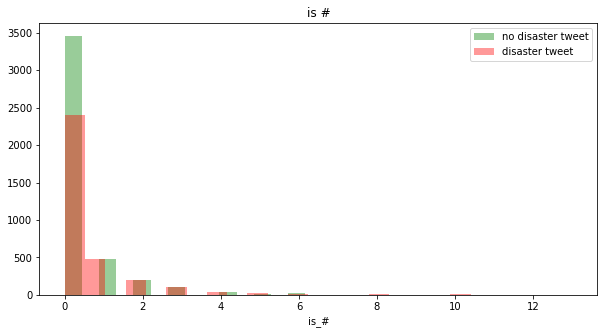

In [ ]:
plt.figure(figsize=(10,5))
fig = sns.distplot(a=train2[train2['target']==0.0]["is_#"], 
                   hist=True, bins=25, kde=False, color="green", 
                   label='no disaster tweet')
fig = sns.distplot(a=train2[train2['target']==1.0]["is_#"], 
                   hist=True, bins=25, kde=False, color="red", 
                   label='disaster tweet')
fig.legend()
fig.set(title='is #');

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


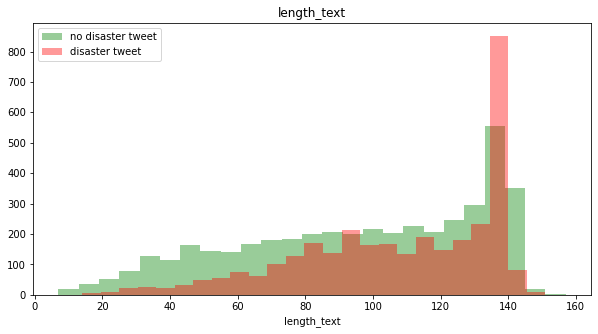

In [ ]:

plt.figure(figsize=(10,5))
fig = sns.distplot(a=train2[train2['target']==0.0]["length_text"], 
                   hist=True, bins=25, kde=False, color="green", 
                   label='no disaster tweet')
fig = sns.distplot(a=train2[train2['target']==1.0]["length_text"], 
                   hist=True, bins=25, kde=False, color="red", 
                   label='disaster tweet')
fig.legend()
fig.set(title='length_text');

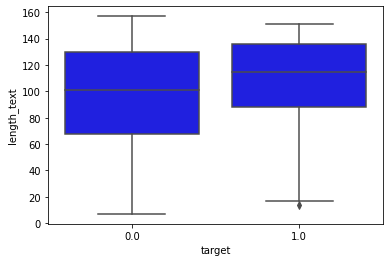

In [ ]:
ax = sns.boxplot(x="target", y="length_text", data=train2, orient='v', color = 'blue')

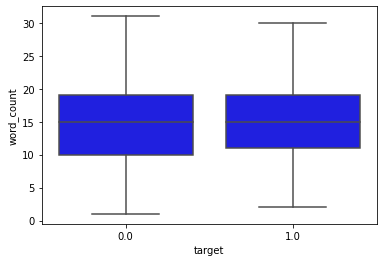

In [ ]:
ax = sns.boxplot(x="target", y="word_count", data=train2, orient='v', color = 'blue')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


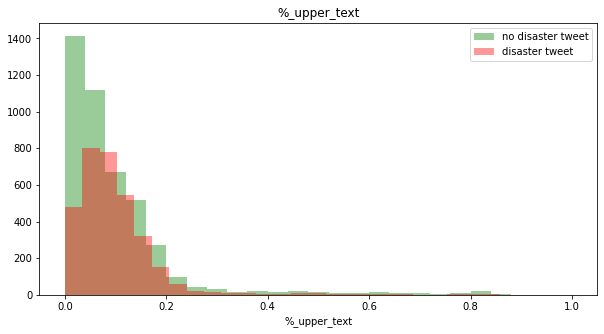

In [ ]:
plt.figure(figsize=(10,5))
fig = sns.distplot(a=train2[train2['target']==0.0]["%_upper_text"], 
                   hist=True, bins=25, kde=False, color="green", 
                   label='no disaster tweet')
fig = sns.distplot(a=train2[train2['target']==1.0]["%_upper_text"], 
                   hist=True, bins=25, kde=False, color="red", 
                   label='disaster tweet')
fig.legend()
fig.set(title='%_upper_text');

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


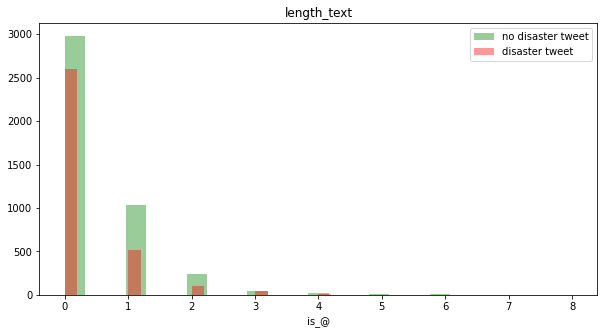

In [ ]:

plt.figure(figsize=(10,5))
fig = sns.distplot(a=train2[train2['target']==0.0]["is_@"], 
                   hist=True, bins=25, kde=False, color="green", 
                   label='no disaster tweet')
fig = sns.distplot(a=train2[train2['target']==1.0]["is_@"], 
                   hist=True, bins=25, kde=False, color="red", 
                   label='disaster tweet')
fig.legend()
fig.set(title='length_text');

## **Fast** **Text**

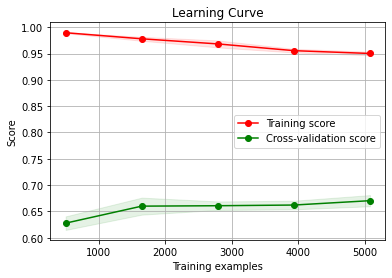

In [ ]:
from gensim.utils import simple_preprocess
import catboost as ctb
from gensim.models import FastText
from scikitplot.estimators import plot_learning_curve

train2['simple_tokens'] = train2['text_aprep'].map(simple_preprocess)

model = FastText(train2['simple_tokens'], size=50, window=3, seed=0)

 #funkcja get_doc2vec_X z wektoryzajca i policzona srednia z wektorow
def get_doc2vec_X(model, tokens):
    def __calc_doc2vec(words):   #wektoryzacja
        return np.mean([model.wv[w] for w in words if w in model.wv], axis=0)

    X = tokens.map(__calc_doc2vec)
    default_vector = X[ False == X.isnull() ].mean()
    return np.stack( X.map(lambda x: default_vector if str(x) == 'nan' else x) )


model = FastText(train2['simple_tokens'], size=100, window=4, seed=0)
X = get_doc2vec_X(model, train2['simple_tokens'])
y = train2['target'].factorize()[0]

fasttext_model = ctb.CatBoostClassifier(max_depth=10, n_estimators=300, verbose=0, random_state=0, custom_metric='AUC')
fasttext_model.fit(X, y)
plot_learning_curve(fasttext_model, X, y, cv=3, random_state=2019, shuffle=True)

In [ ]:
test2['simple_tokens'] = test2['text_aprep'].map(simple_preprocess)
X_test = get_doc2vec_X(model, test2['simple_tokens'])


test2['target'] = fasttext_model.predict(X_test).astype('int32')
test2[[ 'id', 'target'] ].sample(20)

,id,target
2503,8340,1
2495,8325,1
1588,5369,1
2652,8868,1
2097,7035,1
2392,7997,1
1650,5562,1
1081,3563,1
2537,8467,1
2131,7127,1


In [ ]:
test[ ['id', 'target'] ].to_csv('fasttext.csv', index=False)
#Kaggle score:  0.29206

## **BERT**

Pretrained model avaiable on [github](https://github.com/google-research/bert).

In [20]:
!pip install keras_bert

  Created wheel for keras-bert: filename=keras_bert-0.86.0-cp37-none-any.whl size=34144 sha256=6d7993e9406fcab42e97c574cac40093311ef8510cff2fc831b1b9aeb0b51833
  Stored in directory: /root/.cache/pip/wheels/66/f0/b1/748128b58562fc9e31b907bb5e2ab6a35eb37695e83911236b
  Created wheel for keras-transformer: filename=keras_transformer-0.38.0-cp37-none-any.whl size=12942 sha256=158a5fb566c7cd14fbbb4081cd8d162a6d85df5d8399d9664e387580e102bbbe
  Stored in directory: /root/.cache/pip/wheels/e5/fb/3a/37b2b9326c799aa010ae46a04ddb04f320d8c77c0b7e837f4e
  Created wheel for keras-pos-embd: filename=keras_pos_embd-0.11.0-cp37-none-any.whl size=7554 sha256=db5d06a63a0e3b875fcc65e513c4d7a2371a4f431f84504fc4836b44f63424ec
  Stored in directory: /root/.cache/pip/wheels/5b/a1/a0/ce6b1d49ba1a9a76f592e70cf297b05c96bc9f418146761032
  Created wheel for keras-multi-head: filename=keras_multi_head-0.27.0-cp37-none-any.whl size=15611 sha256=536c85b60439ac1449a3839a0a7200c08dbf3673239a290f01a34cdaf57a66c7
  Stor

In [21]:
!pip install transformers

     |████████████████████████████████| 1.9MB 18.3MB/s 
     |████████████████████████████████| 890kB 53.6MB/s 
     |████████████████████████████████| 3.2MB 49.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=9ca491df19180888e827ea5ab01ffd80b6e2c533a8dcf051497f3dca604f7e4e
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [22]:
from keras_bert import load_trained_model_from_checkpoint
from transformers import BertTokenizer

In [23]:
bert_model = 'uncased_L-12_H-768_A-12'
tokenizer = BertTokenizer.from_pretrained('uncased_L-12_H-768_A-12/vocab.txt', do_lower_case=True) #load wocabulary
model = load_trained_model_from_checkpoint('uncased_L-12_H-768_A-12/bert_config.json', 'uncased_L-12_H-768_A-12/bert_model.ckpt')

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated


In [36]:
def get_vectors(tokenizer, dataframe, col_name):
    tokenize = lambda sentence: tokenizer.encode_plus(sentence, max_length=512, padding='max_length', truncation=True) #add [CSL/SEP]
    dataframe['tokens'] = dataframe[col_name].map(tokenize)

    #keys
    dataframe['input_ids'] = dataframe['tokens'].map(lambda x: x['input_ids'])
    dataframe['token_type_ids'] = dataframe['tokens'].map(lambda x: x['token_type_ids'])
    
    #zmienia liste w liscie na macierz
    input_ids = np.stack(dataframe['input_ids']) 
    token_type_ids = np.stack(dataframe['token_type_ids'])

    vectors = {'input_ids': input_ids, 'token_type_ids': token_type_ids}
    return vectors

In [49]:
def bert_predict_in_batches(vectors, num_batches, output_shape):

  vector_input_ids_batches = np.array_split(vectors['input_ids'], num_batches)
  vector_token_type_ids_batches = np.array_split(vectors['token_type_ids'], num_batches)
  

  X = np.array([]).reshape((0, output_shape))
  model = load_trained_model_from_checkpoint('uncased_L-12_H-768_A-12/bert_config.json', 'uncased_L-12_H-768_A-12/bert_model.ckpt', training=False)
  input_vectors = zip(vector_input_ids_batches, vector_token_type_ids_batches)
  for input_ids, token_type_ids in input_vectors:
    all_vectors = (input_ids, token_type_ids)
    predictions = model.predict(all_vectors, verbose=1)

    X_batch = predictions[:, 0, :]
    print('current predictions shape: ', X_batch.shape)
    X = np.concatenate([X, X_batch])
    print('all predictions shape: ', X.shape)

  return X

In [50]:
bert_vectors = get_vectors(tokenizer, test2, 'text_aprep')

In [51]:
bert_output_shape = model.layers[-1].output_shape[2]

In [52]:
test_X_text_aprep = bert_predict_in_batches(bert_vectors, 10, bert_output_shape)
np.save('test_X_text_aprep.npy', test_X_text_aprep)

11/11 [==============================] - 20s 1s/step
current predictions shape:  (327, 768)
all predictions shape:  (327, 768)
11/11 [==============================] - 15s 1s/step
current predictions shape:  (327, 768)
all predictions shape:  (654, 768)
11/11 [==============================] - 16s 1s/step
current predictions shape:  (327, 768)
all predictions shape:  (981, 768)
11/11 [==============================] - 16s 1s/step
current predictions shape:  (326, 768)
all predictions shape:  (1307, 768)
11/11 [==============================] - 15s 1s/step
current predictions shape:  (326, 768)
all predictions shape:  (1633, 768)
11/11 [==============================] - 15s 1s/step
current predictions shape:  (326, 768)
all predictions shape:  (1959, 768)
11/11 [==============================] - 15s 1s/step
current predictions shape:  (326, 768)
all predictions shape:  (2285, 768)
11/11 [==============================] - 15s 1s/step
current predictions shape:  (326, 768)
all predictions

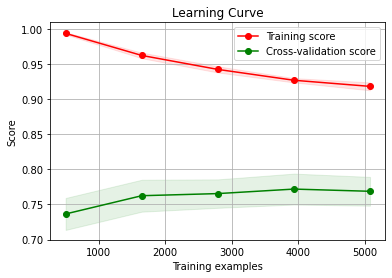

In [55]:
import catboost as ctb
from scikitplot.estimators import plot_learning_curve
X_train = np.load("train_X_text_aprep.npy")
X_test = np.load("test_X_text_aprep.npy")

y_train = train2['target'].values

model = ctb.CatBoostClassifier(max_depth=5, n_estimators=100, verbose=0, random_state=0, custom_metric='AUC')
model.fit(X_train, y_train)
plot_learning_curve(model, X_train, y_train, cv=3, random_state=2019, shuffle=True)

In [56]:

test2['target'] = model.predict(X_test).astype('int32')
test2[[ 'id', 'target'] ].sample(20)

,id,target
245,785,0
2322,7776,0
810,2662,0
1015,3333,0
1613,5435,1
2811,9349,1
61,202,0
436,1413,0
794,2613,0
1042,3424,0


In [57]:
test2[ ['id', 'target'] ].to_csv('bert_aprep.csv', index=False)

Kaggle score: 0.77597

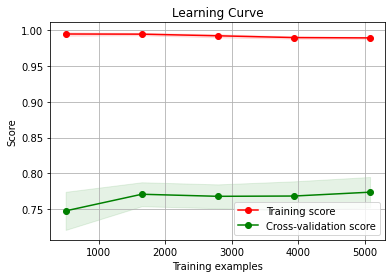

In [58]:
import catboost as ctb
from scikitplot.estimators import plot_learning_curve
X_train = np.load("train_X_text_aprep.npy")
X_test = np.load("test_X_text_aprep.npy")

y_train = train2['target'].values

model = ctb.CatBoostClassifier(max_depth=8, n_estimators=200, verbose=0, random_state=0, custom_metric='AUC')
model.fit(X_train, y_train)
plot_learning_curve(model, X_train, y_train, cv=3, random_state=2019, shuffle=True)

In [60]:
test2['target'] = model.predict(X_test).astype('int32')
test2[ ['id', 'target'] ].to_csv('bert_aprep2.csv', index=False)

Kaggle score: 0.78486

## **Hero+Bert**

In [ ]:
!pip install texthero

In [62]:
import texthero as hero

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [63]:
train2["text_clean"] = hero.clean(train2["text_aprep"])
test2["text_clean"] = hero.clean(test2["text_aprep"])

In [ ]:
train2.head()

In [67]:
bert_model = 'uncased_L-12_H-768_A-12'
tokenizer = BertTokenizer.from_pretrained('uncased_L-12_H-768_A-12/vocab.txt', do_lower_case=True) #load wocabulary
model = load_trained_model_from_checkpoint('uncased_L-12_H-768_A-12/bert_config.json', 'uncased_L-12_H-768_A-12/bert_model.ckpt')

Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated


In [71]:
bert_vectors = get_vectors(tokenizer, train2, 'text_clean')

In [72]:
bert_output_shape = model.layers[-1].output_shape[2]

In [73]:
train_X_text_clean = bert_predict_in_batches(bert_vectors, 10, bert_output_shape)
np.save('train_X_text_clean.npy', train_X_text_clean)

24/24 [==============================] - 37s 1s/step
current predictions shape:  (762, 768)
all predictions shape:  (762, 768)
24/24 [==============================] - 34s 1s/step
current predictions shape:  (762, 768)
all predictions shape:  (1524, 768)
24/24 [==============================] - 34s 1s/step
current predictions shape:  (762, 768)
all predictions shape:  (2286, 768)
24/24 [==============================] - 35s 1s/step
current predictions shape:  (761, 768)
all predictions shape:  (3047, 768)
24/24 [==============================] - 35s 1s/step
current predictions shape:  (761, 768)
all predictions shape:  (3808, 768)
24/24 [==============================] - 35s 1s/step
current predictions shape:  (761, 768)
all predictions shape:  (4569, 768)
24/24 [==============================] - 35s 1s/step
current predictions shape:  (761, 768)
all predictions shape:  (5330, 768)
24/24 [==============================] - 35s 1s/step
current predictions shape:  (761, 768)
all predictio

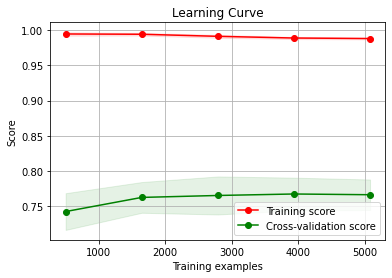

In [74]:
import catboost as ctb
from scikitplot.estimators import plot_learning_curve
X_train = np.load("train_X_text_clean.npy")
X_test = np.load("test_X_text_clean.npy")

y_train = train2['target'].values

model = ctb.CatBoostClassifier(max_depth=8, n_estimators=200, verbose=0, random_state=0, custom_metric='AUC')
model.fit(X_train, y_train)
plot_learning_curve(model, X_train, y_train, cv=3, random_state=2019, shuffle=True)

In [75]:
test2['target'] = model.predict(X_test).astype('int32')
test2[ ['id', 'target'] ].to_csv('bert_clean.csv', index=False)

Kaggle score: 0.78669